In [36]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [37]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [38]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [39]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [40]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [41]:
X=data[['f1','f2','f3']].values
y=data['y'].values
print(X.shape)
print(y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

### Logistic Regression

In [42]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

clf = SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)
clf.fit(X, y)

-- Epoch 1
Norm: 1.08, NNZs: 3, Bias: -0.001751, T: 200, Avg. loss: 2516.147588
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.61, NNZs: 3, Bias: -0.001551, T: 400, Avg. loss: 2621.694380
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.35, NNZs: 3, Bias: -0.001850, T: 600, Avg. loss: 3285.222158
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.64, NNZs: 3, Bias: -0.003527, T: 800, Avg. loss: 3142.216822
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.48, NNZs: 3, Bias: -0.004027, T: 1000, Avg. loss: 3009.886714
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.40, NNZs: 3, Bias: -0.003523, T: 1200, Avg. loss: 3032.001946
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds


SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

Feature: 0, Score: 0.37170
Feature: 1, Score: -1.34464
Feature: 2, Score: 0.12669


<BarContainer object of 3 artists>

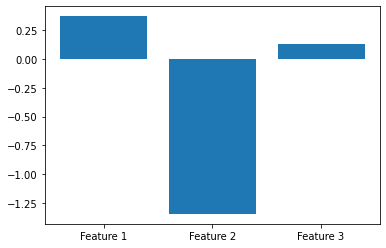

In [43]:
importance = clf.coef_[0]
for i, j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, j))
    
features = ['Feature 1', 'Feature 2', 'Feature 3']
plt.bar(features, clf.coef_[0])

## SVM

In [44]:
clf = SGDClassifier(eta0=0.0001, learning_rate='constant', loss='hinge',
              random_state=15, verbose=2)
clf.fit(X, y)

-- Epoch 1
Norm: 0.61, NNZs: 3, Bias: -0.001600, T: 200, Avg. loss: 2634.084615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.68, NNZs: 3, Bias: -0.001100, T: 400, Avg. loss: 2593.136418
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.76, NNZs: 3, Bias: -0.000900, T: 600, Avg. loss: 3308.216351
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.77, NNZs: 3, Bias: -0.002700, T: 800, Avg. loss: 3155.085896
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.93, NNZs: 3, Bias: -0.002800, T: 1000, Avg. loss: 3080.501847
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.43, NNZs: 3, Bias: -0.002700, T: 1200, Avg. loss: 3011.887174
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.69, NNZs: 3, Bias: -0.002200, T: 1400, Avg. loss: 3002.132514
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


SGDClassifier(eta0=0.0001, learning_rate='constant', random_state=15, verbose=2)

Feature: 0, Score: 0.38249
Feature: 1, Score: -0.55765
Feature: 2, Score: 0.15408


<BarContainer object of 3 artists>

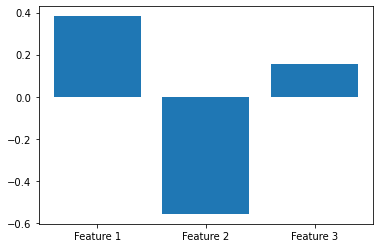

In [45]:
importance = clf.coef_[0]
for i, j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, j))
    
features = ['Feature 1', 'Feature 2', 'Feature 3']
plt.bar(features, clf.coef_[0])

# Observation:
- Here, trying to manually observe, the first feature can be said to be the most imortant as it shows the highest amount of correlation with the other features. Moreover, it provides the most information. 
- However, if we choose to let go of the SGD classifier, we can import methods like 'feature_importances_' to predict the most imporant features.

## Task 2

### Logistic Regression

In [46]:
scaler = StandardScaler()
y = y.reshape(-1, 1)

scaled_X = scaler.fit_transform(X) 
scaled_y = scaler.fit_transform(y)

In [52]:
clf = SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)
clf.fit(scaled_X, scaled_y)

-- Epoch 1
Norm: 0.01, NNZs: 3, Bias: 0.000001, T: 200, Avg. loss: 0.691431
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 3, Bias: 0.000002, T: 400, Avg. loss: 0.687922
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 3, Bias: 0.000002, T: 600, Avg. loss: 0.684449
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.03, NNZs: 3, Bias: 0.000003, T: 800, Avg. loss: 0.681011
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.04, NNZs: 3, Bias: 0.000003, T: 1000, Avg. loss: 0.677608
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 3, Bias: 0.000003, T: 1200, Avg. loss: 0.674240
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 3, Bias: 0.000003, T: 1400, Avg. loss: 0.670905
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 3, Bias: 0.000003, T: 1600, Avg. loss: 0.667605
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.07, NNZs: 3, Bias: 0.000002, T: 1800, Avg. loss: 0.664338
Total training time: 0.00 secon

C:\Users\Suresh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

Feature: 0, Score: 0.01183
Feature: 1, Score: -0.00302
Feature: 2, Score: 0.15963


<BarContainer object of 3 artists>

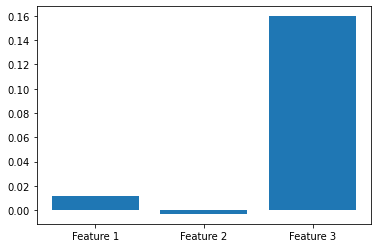

In [51]:
importance = clf.coef_[0]
for i, j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, j))
    
    
features = ['Feature 1', 'Feature 2', 'Feature 3']
plt.bar(features, clf.coef_[0])

### SVM

In [53]:
clf = SGDClassifier(eta0=0.0001, learning_rate='constant', loss='hinge',
              random_state=15, verbose=2)
clf.fit(scaled_X, scaled_y)

-- Epoch 1
Norm: 0.02, NNZs: 3, Bias: 0.000000, T: 200, Avg. loss: 0.993111
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 3, Bias: -0.000000, T: 400, Avg. loss: 0.978934
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 3, Bias: 0.000000, T: 600, Avg. loss: 0.964757
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 3, Bias: 0.000000, T: 800, Avg. loss: 0.950580
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.08, NNZs: 3, Bias: -0.000000, T: 1000, Avg. loss: 0.936403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.10, NNZs: 3, Bias: 0.000000, T: 1200, Avg. loss: 0.922226
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.12, NNZs: 3, Bias: 0.000000, T: 1400, Avg. loss: 0.908049
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.13, NNZs: 3, Bias: 0.000000, T: 1600, Avg. loss: 0.893873
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.15, NNZs: 3, Bias: 0.000000, T: 1800, Avg. loss: 0.879696
Total training time: 0.00 sec

C:\Users\Suresh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SGDClassifier(eta0=0.0001, learning_rate='constant', random_state=15, verbose=2)

Feature: 0, Score: 0.04249
Feature: 1, Score: 0.02585
Feature: 2, Score: 1.07273


<BarContainer object of 3 artists>

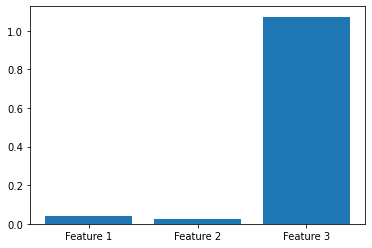

In [54]:
importance = clf.coef_[0]
for i, j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, j))
    
    
features = ['Feature 1', 'Feature 2', 'Feature 3']
plt.bar(features, clf.coef_[0])

# Observations:

- Here, after standardizing our data, feature number 3 clearly has the highest correlation with other features and also variance. Hence, it is the most important feature for this task